In [158]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pickle import dump

from gains_plotter import GainsPlottter
from gains_train_data_processor import GainsTrainDataProcessor
from sklearn.model_selection import train_test_split

# Load datasets

In [159]:
dataset = pd.read_csv('datasets/gains_sp500-sn.csv', parse_dates=['Date'])
dataset.pop('index')
dataset.head()

,Date,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,2015-11-25,2047.621080,2050.057677,2061.574773,2034.086215,3.688111e+09,3.502933e+09,4.047090e+09,2053.781587,2075.580403,2059.917979,-5.447723,56.853071,44.821146
1,2015-11-27,2046.417635,2048.701699,2059.611716,2033.003699,3.755930e+09,3.550142e+09,4.010047e+09,2051.906546,2072.938288,2057.841003,-6.121139,57.562785,42.362831
2,2015-11-30,2045.398512,2047.540035,2057.818618,2032.074998,3.842323e+09,3.647447e+09,3.982266e+09,2050.288257,2070.309322,2055.926774,-6.660285,50.002820,40.349431
3,2015-12-01,2044.533088,2046.525968,2056.174498,2031.265302,3.995976e+09,3.767524e+09,3.964213e+09,2048.892673,2067.715033,2054.173899,-7.075828,60.822026,37.629068
4,2015-12-02,2043.724097,2045.626044,2054.638913,2030.505074,4.142517e+09,3.884971e+09,3.957030e+09,2047.690285,2065.181871,2052.566237,-7.385295,47.728253,35.549907


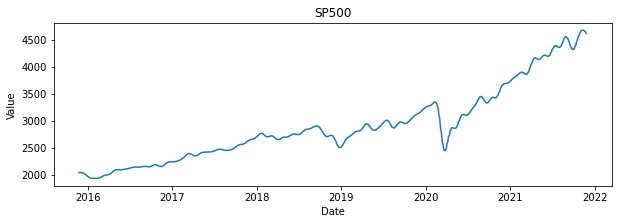

In [160]:
GainsPlottter.plot_stock_timeline('SP500', dataset['Date'], dataset['x1'])

In [161]:
news_df = pd.read_csv('datasets/news_score.csv', parse_dates=['Date'])
news_df

,Date,score
0,2019-02-12,0.307235
1,2019-02-13,0.416932
2,2019-02-14,0.851903
3,2019-02-15,-0.900688
4,2019-02-22,0.191497
...,...,...
368,2021-12-14,-0.334422
369,2021-12-15,0.291806
370,2021-12-16,-0.952843
371,2021-12-17,-0.745533


In [162]:
final_dataframe = pd.merge_asof(dataset, news_df, on="Date")
final_dataframe['score'] = final_dataframe['score'].replace(np.nan, 0)
final_dataframe

,Date,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,score
0,2015-11-25,2047.621080,2050.057677,2061.574773,2034.086215,3.688111e+09,3.502933e+09,4.047090e+09,2053.781587,2075.580403,2059.917979,-5.447723,56.853071,44.821146,0.000000
1,2015-11-27,2046.417635,2048.701699,2059.611716,2033.003699,3.755930e+09,3.550142e+09,4.010047e+09,2051.906546,2072.938288,2057.841003,-6.121139,57.562785,42.362831,0.000000
2,2015-11-30,2045.398512,2047.540035,2057.818618,2032.074998,3.842323e+09,3.647447e+09,3.982266e+09,2050.288257,2070.309322,2055.926774,-6.660285,50.002820,40.349431,0.000000
3,2015-12-01,2044.533088,2046.525968,2056.174498,2031.265302,3.995976e+09,3.767524e+09,3.964213e+09,2048.892673,2067.715033,2054.173899,-7.075828,60.822026,37.629068,0.000000
4,2015-12-02,2043.724097,2045.626044,2054.638913,2030.505074,4.142517e+09,3.884971e+09,3.957030e+09,2047.690285,2065.181871,2052.566237,-7.385295,47.728253,35.549907,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,2021-11-19,4659.840437,4663.080977,4685.876812,4627.758697,3.068663e+09,3.247248e+09,3.165707e+09,4670.638301,4652.278070,4662.193845,44.896201,55.979497,31.768143,0.100433
1508,2021-11-22,4652.878733,4657.470544,4684.944968,4618.931988,3.268397e+09,3.187901e+09,3.151668e+09,4666.777070,4656.476269,4660.760751,40.827471,45.007570,32.276508,0.132799
1509,2021-11-23,4645.436090,4650.269172,4682.131205,4608.564451,3.285002e+09,3.152175e+09,3.145742e+09,4661.969891,4659.532850,4658.403111,36.580734,49.673965,31.612581,-0.355548
1510,2021-11-24,4636.808935,4642.624279,4678.792311,4597.471344,3.060441e+09,3.131534e+09,3.138100e+09,4656.213451,4661.489074,4655.080930,32.148437,58.082908,31.074933,-0.556258


In [163]:
final_dataframe.isnull().sum()
final_dataframe.iloc[:, 1:] = pd.concat([final_dataframe.iloc[:, 1:].ffill(), final_dataframe.iloc[:, 1:].bfill()]).groupby(level=0).mean()
final_dataframe.columns

Index(['Date', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'score'],
      dtype='object')

In [164]:
# Set the date to datetime data
datetime_series = pd.to_datetime(final_dataframe['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
final_dataframe = final_dataframe.set_index(datetime_index)
final_dataframe = final_dataframe.sort_values(by='Date')
final_dataframe = final_dataframe.drop(columns='Date')

X_df = pd.DataFrame(final_dataframe.iloc[:, :])
Y_df = pd.DataFrame(final_dataframe.iloc[:, 0])

X_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,score
2015-11-25,2047.621080,2050.057677,2061.574773,2034.086215,3.688111e+09,3.502933e+09,4.047090e+09,2053.781587,2075.580403,2059.917979,-5.447723,56.853071,44.821146,0.000000
2015-11-27,2046.417635,2048.701699,2059.611716,2033.003699,3.755930e+09,3.550142e+09,4.010047e+09,2051.906546,2072.938288,2057.841003,-6.121139,57.562785,42.362831,0.000000
2015-11-30,2045.398512,2047.540035,2057.818618,2032.074998,3.842323e+09,3.647447e+09,3.982266e+09,2050.288257,2070.309322,2055.926774,-6.660285,50.002820,40.349431,0.000000
2015-12-01,2044.533088,2046.525968,2056.174498,2031.265302,3.995976e+09,3.767524e+09,3.964213e+09,2048.892673,2067.715033,2054.173899,-7.075828,60.822026,37.629068,0.000000
2015-12-02,2043.724097,2045.626044,2054.638913,2030.505074,4.142517e+09,3.884971e+09,3.957030e+09,2047.690285,2065.181871,2052.566237,-7.385295,47.728253,35.549907,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-19,4659.840437,4663.080977,4685.876812,4627.758697,3.068663e+09,3.247248e+09,3.165707e+09,4670.638301,4652.278070,4662.193845,44.896201,55.979497,31.768143,0.100433
2021-11-22,4652.878733,4657.470544,4684.944968,4618.931988,3.268397e+09,3.187901e+09,3.151668e+09,4666.777070,4656.476269,4660.760751,40.827471,45.007570,32.276508,0.132799
2021-11-23,4645.436090,4650.269172,4682.131205,4608.564451,3.285002e+09,3.152175e+09,3.145742e+09,4661.969891,4659.532850,4658.403111,36.580734,49.673965,31.612581,-0.355548
2021-11-24,4636.808935,4642.624279,4678.792311,4597.471344,3.060441e+09,3.131534e+09,3.138100e+09,4656.213451,4661.489074,4655.080930,32.148437,58.082908,31.074933,-0.556258


In [165]:
Y_df

,x1
2015-11-25,2047.621080
2015-11-27,2046.417635
2015-11-30,2045.398512
2015-12-01,2044.533088
2015-12-02,2043.724097
...,...
2021-11-19,4659.840437
2021-11-22,4652.878733
2021-11-23,4645.436090
2021-11-24,4636.808935


In [166]:
# Normalized the data
X_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaler.fit(X_df)
y_scaler.fit(Y_df)

X_scale_dataset = X_scaler.fit_transform(X_df)
y_scale_dataset = y_scaler.fit_transform(Y_df)

dump(X_scaler, open('X_scaler.pkl', 'wb'))
dump(y_scaler, open('y_scaler.pkl', 'wb'))

In [167]:
history_day = 120
x_pretrain = []
y_pretrain = []
for  x in range(history_day , len(y_scale_dataset)-1):
    x_pretrain.append( X_scale_dataset[x-history_day:x-1,:] )
    y_pretrain.append( y_scale_dataset[x+1])


In [168]:
np.array(x_pretrain).shape

(1391, 119, 14)

In [169]:
np.array(y_pretrain).shape

(1391, 1)

In [170]:
X_train, X_test_split, y_train, y_test_split = train_test_split(np.array(x_pretrain),
                                                                np.array(y_pretrain), test_size=0.33, shuffle = False)

In [171]:
X_test, X_val, y_test, y_val = train_test_split(X_test_split, y_test_split, test_size=0.33, shuffle = False)

In [172]:
X_train.shape

(931, 119, 14)

In [173]:
X_test.shape

(308, 119, 14)

In [174]:
X_val.shape

(152, 119, 14)

In [175]:
# print('X shape: ', X.shape)
# print('y shape: ', y.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('y_c_train shape: ', X_val.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
print('y_c_test shape: ', y_val.shape)
# print('index_train shape:', index_train.shape)
# print('index_test shape:', index_test.shape)

X_train shape:  (931, 119, 14)
y_train shape:  (931, 1)
y_c_train shape:  (152, 119, 14)
X_test shape:  (308, 119, 14)
y_test shape:  (308, 1)
y_c_test shape:  (152, 1)


In [176]:
import os

# os.mkdir('npdata_new')

np_data_path = './npdata_new'

np.save(f"{np_data_path}/X_train.npy", X_train)
np.save(f"{np_data_path}/y_train.npy", y_train)
np.save(f"{np_data_path}/X_test.npy", X_test)
np.save(f"{np_data_path}/y_test.npy", y_test)
np.save(f"{np_data_path}/X_val.npy", X_val)
np.save(f"{np_data_path}/y_val.npy", y_val)
# np.save(f'{np_data_path}/index_train.npy', index_train)
# np.save(f'{np_data_path}/index_test.npy', index_test)